# Towers of Hanoi

Towers of Hanoi consists of three towers built up of disks. Initialy, there is only a single tower consisting of $n$ disks.  Each disk is smaller than the one it rests on.  Each day, the monks move a single disk to one of the three towers.  However, a larger disk may never  rest on a smaller one.  The objective is to remove all disks from the first tower, building up the second, using the third as required.

## Required imports

In [3]:
import copy
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches
from IPython.display import HTML

Class that represents the towers, and implements the solution.

In [4]:
class Hanoi:
    
    def __init__(self, nr_disks):
        self._nr_disks = nr_disks
        self._towers = [list(range(nr_disks, 0, -1)), list(), list()]
        
    @property
    def nr_disks(self):
        return self._nr_disks
    
    @property
    def nr_moves(self):
        return 2**self.nr_disks - 1
    
    @property
    def towers(self):
        return copy.deepcopy(self._towers)
    
    def tower(self, n):
        return self._towers[n].copy()
    
    def move_disk(self, from_tower, to_tower):
        disk = self._towers[from_tower].pop()
        self._towers[to_tower].append(disk)
        return disk, from_tower, to_tower
    
    def move_disks(self, n, from_tower, to_tower):
        if n == 1:
            yield self.move_disk(from_tower, to_tower)
        else:
            helper = 3 - from_tower - to_tower
            yield from self.move_disks(n - 1, from_tower, helper)
            yield self.move_disk(from_tower, to_tower)
            yield from self.move_disks(n - 1, helper, to_tower)
            
    def solve(self):
        for move in self.moves():
            print('disk {0} from {1} to {2}'.format(*move))
        
    def moves(self):
        yield from self.move_disks(self.nr_disks, 0, 1)

Example of 4 disks on the original tower, and the solution.

In [5]:
hanoi = Hanoi(4)
hanoi.solve()
print(f'number of moves: {hanoi.nr_moves}')

disk 1 from 0 to 2
disk 2 from 0 to 1
disk 1 from 2 to 1
disk 3 from 0 to 2
disk 1 from 1 to 0
disk 2 from 1 to 2
disk 1 from 0 to 2
disk 4 from 0 to 1
disk 1 from 2 to 1
disk 2 from 2 to 0
disk 1 from 1 to 0
disk 3 from 2 to 1
disk 1 from 0 to 2
disk 2 from 0 to 1
disk 1 from 2 to 1
number of moves: 15


Class that implements the visualization of the Towers of Hanoi.  When an object is created, it will initialize a matplotlib `figure`, and set the properties of the axes.  Two methods create an initialization and animation function to be used with matplotlib animation.

In [6]:
class HanoiView:
    
    def __init__(self, hanoi):
        self._nr_moves = hanoi.nr_moves
        self._figure, self._axes = plt.subplots()
        self._width = hanoi.nr_disks*3 + 4
        self._height = hanoi.nr_disks + 1
        self._center = self._width/2
        self._x_towers = [
            self._center - hanoi.nr_disks - 1,
            self._center,
            self._center + hanoi.nr_disks + 1,
        ]
        self._axes.set_xlim(0.0, self._width)
        self._axes.get_xaxis().set_visible(False)
        self._axes.set_ylim(0.0, self._height)
        self._axes.get_yaxis().set_visible(False)
        self._tower_states = list([hanoi.towers])
        self._disks = list()
        for _ in hanoi.moves():
            self._tower_states.append(hanoi.towers)
    
    @property
    def figure(self):
        return self._figure

    def create_animation(self):
        return FuncAnimation(self.figure, self.create_animate(),
                             init_func=self.create_init(),
                             frames=self._nr_moves  + 1)
        
    def create_animate(self):
        def animate(i):
            self.draw(i)
        return animate

    def create_init(self):
        def init():
            self.draw(0)
        return init
    
    def draw(self, move_nr):
        while (self._disks):
            disk = self._disks.pop()
            disk.remove()
        for tower_nr in range(3):
            for i, disk in enumerate(self._tower_states[move_nr][tower_nr]):
                self._disks.append(HanoiView.create_rect((self._x_towers[tower_nr], i/2),
                                                         disk, 0.5, 'red'))
                self._axes.add_patch(self._disks[-1])
        return self._disks

    @staticmethod
    def create_rect(xy, width, height, color):
        return patches.Rectangle((xy[0] - width/2, xy[1]), width, height,
                                 edgecolor='black', facecolor=color)

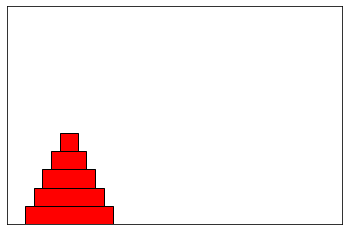

In [7]:
nr_disks = 5
hanoi = Hanoi(nr_disks)
hanoi_view = HanoiView(hanoi)
animation = hanoi_view.create_animation()
HTML(animation.to_jshtml())